In [1]:
# Loading necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading datasets from current folder

orders = pd.read_csv('./Orders.csv')
details = pd.read_csv('./Details.csv')

In [43]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
 5   Order Mode    500 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [42]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB


# Exploratory Data Analysis (EDA):

In [3]:
orders.head()

,Order ID,Order Date,CustomerName,State,City,Order Mode
0,B-25709,01-07-2018,Aakanksha,Madhya Pradesh,Indore,Online
1,B-25608,08-04-2018,Aarushi,Tamil Nadu,Chennai,Store
2,B-26081,22-03-2018,Aarushi,Tamil Nadu,Chennai,Online
3,B-26018,14-02-2018,Aarushi,Tamil Nadu,Chennai,Store
4,B-25830,26-10-2018,Aastha,Himachal Pradesh,Simla,Store


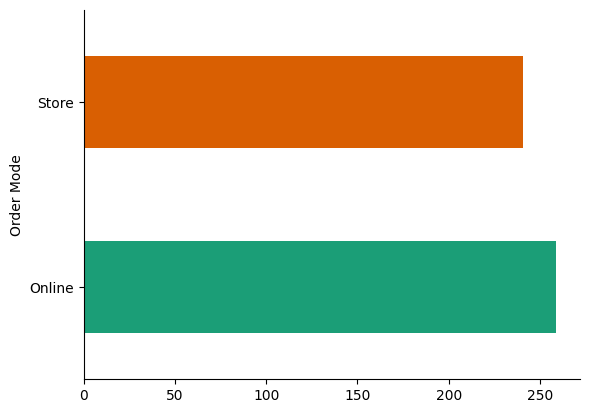

In [4]:
# Group the orders data by Order Mode,
# count the entries in each group as a horizontal bar chart

orders.groupby('Order Mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

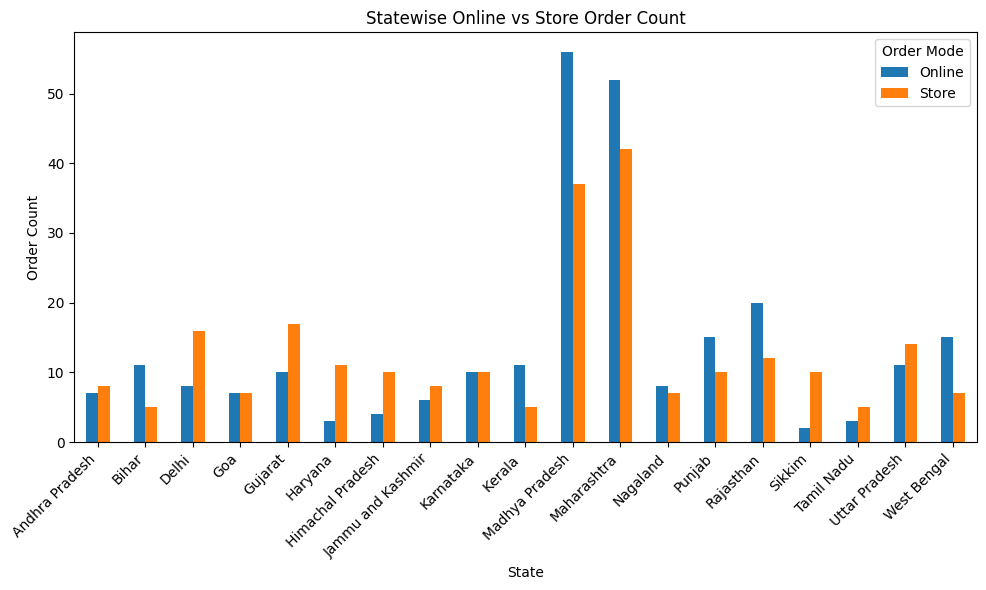

In [5]:
# This plot shows how different 'Order Mode' s performs in different states

statewise_order_mode = orders.groupby(['State', 'Order Mode']).size().unstack(fill_value=0)
statewise_order_mode.plot(kind='bar', figsize=(10, 6))
plt.title('Statewise Online vs Store Order Count')
plt.xlabel('State')
plt.ylabel('Order Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Order Mode')
plt.tight_layout()
plt.show()

In [6]:
# Statistics of the 'Orders' dataset
orders.describe()

,Order ID,Order Date,CustomerName,State,City,Order Mode
count,500,500,500,500,500,500
unique,500,307,336,19,25,2
top,B-25709,24-11-2018,Shreya,Maharashtra,Indore,Online
freq,1,7,6,94,71,259


In [7]:
# Statistics of the 'Details' dataset
details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


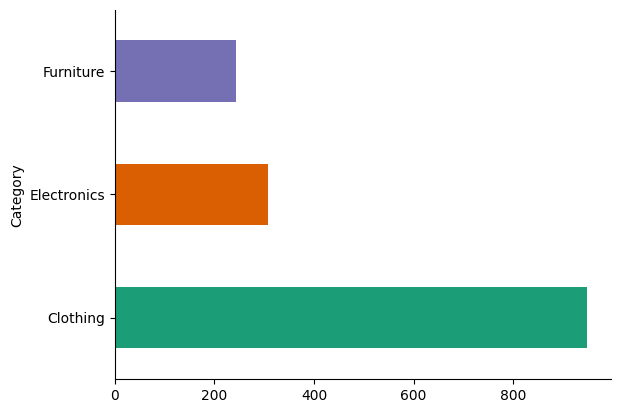

In [8]:
# Overall sales data of all categories

details.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

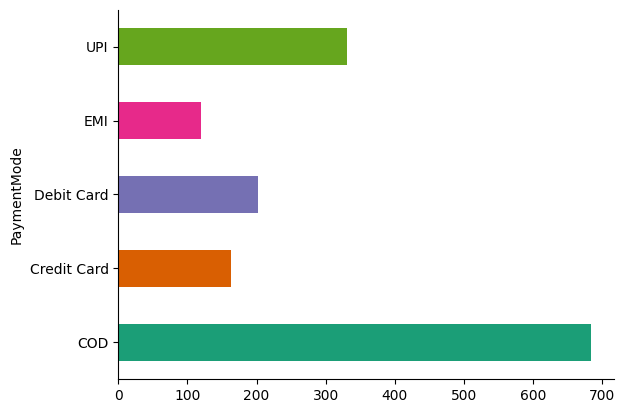

In [9]:
# Different payment modes utilised by customers for their orders
details.groupby('PaymentMode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-10-d382393ef000>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(details, x='Profit', y='Category', inner='box', palette='Dark2')


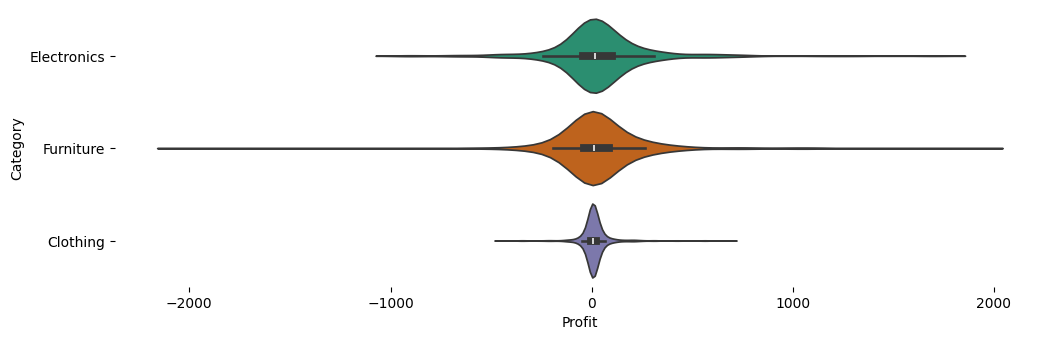

In [10]:
# Violin plot of 'Category' column showing the variation of 'Profit' across differetn categories
figsize = (12, 1.2 * len(details['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(details, x='Profit', y='Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-11-ad92a64e9379>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(details, x='Amount', y='Category', inner='box', palette='Dark2')


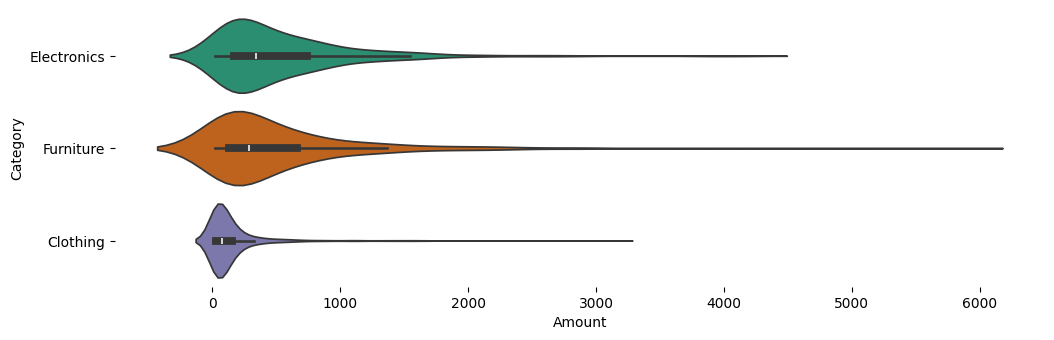

In [11]:
# Violin plot showing the variaiton of 'Amount' (revenue) across different 'Category's
figsize = (12, 1.2 * len(details['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(details, x='Amount', y='Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-12-76a15b3e7008>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(details, x='Amount', y='PaymentMode', inner='box', palette='Dark2')


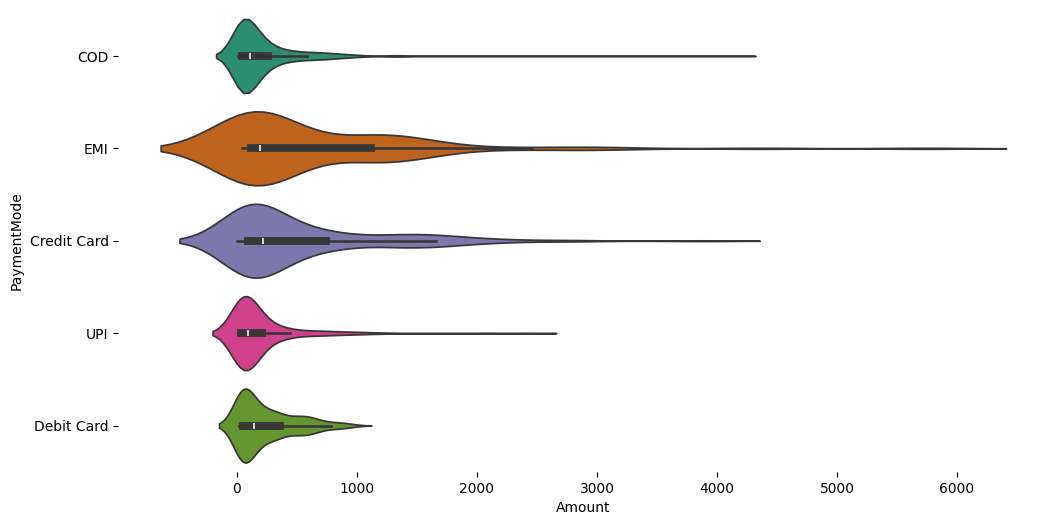

In [12]:
# How 'Amount' (revenue) is generated by different 'PaymentMode's
figsize = (12, 1.2 * len(details['PaymentMode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(details, x='Amount', y='PaymentMode', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-13-3a2f74eafeba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(details, x='Profit', y='PaymentMode', inner='box', palette='Dark2')


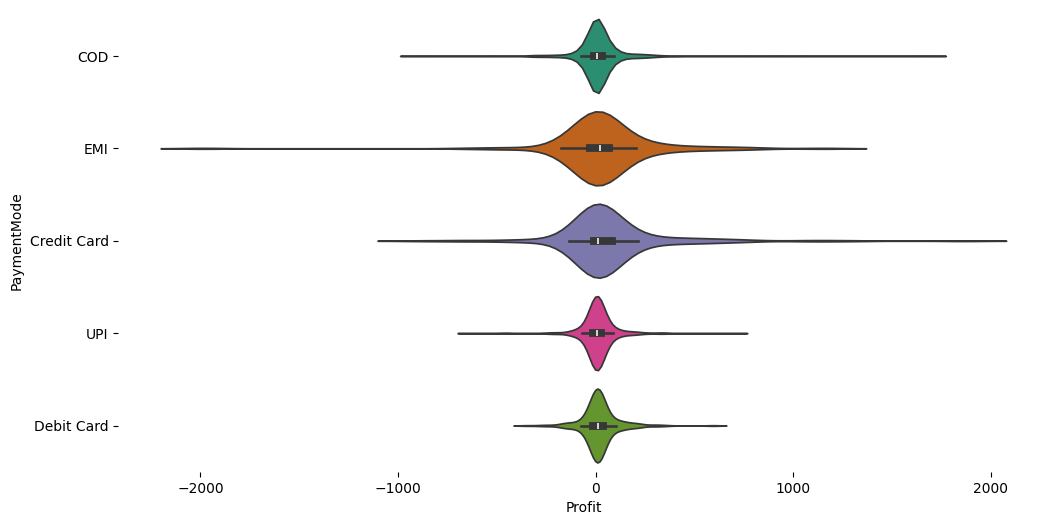

In [13]:
# How 'Profit' is generated by different 'PaymentMode's
figsize = (12, 1.2 * len(details['PaymentMode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(details, x='Profit', y='PaymentMode', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Data Preprocessing:

In [14]:
orders.head()

,Order ID,Order Date,CustomerName,State,City,Order Mode
0,B-25709,01-07-2018,Aakanksha,Madhya Pradesh,Indore,Online
1,B-25608,08-04-2018,Aarushi,Tamil Nadu,Chennai,Store
2,B-26081,22-03-2018,Aarushi,Tamil Nadu,Chennai,Online
3,B-26018,14-02-2018,Aarushi,Tamil Nadu,Chennai,Store
4,B-25830,26-10-2018,Aastha,Himachal Pradesh,Simla,Store


 ## Checking for null values  & NaN values

In [15]:
orders.isnull().sum()

,0
Order ID,0
Order Date,0
CustomerName,0
State,0
City,0
Order Mode,0


In [16]:
details.isnull().sum()

,0
Order ID,0
Amount,0
Profit,0
Quantity,0
Category,0
Sub-Category,0
PaymentMode,0


In [17]:
orders.isnull().any().any()

False

In [18]:
details.isnull().any().any()

False

## Checking for duplicate rows/columns

In [19]:
duplicates = orders[orders.duplicated()]

In [20]:
duplicates

,Order ID,Order Date,CustomerName,State,City,Order Mode


In [21]:
orders_all_duplicates = orders[orders.duplicated(keep=False)]

In [22]:
orders_all_duplicates

,Order ID,Order Date,CustomerName,State,City,Order Mode


In [23]:
details_all_duplicates = details[details.duplicated(keep=False)]

In [24]:
details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [25]:
details['Amount'].describe()

,Amount
count,1500.000000
mean,291.847333
std,461.924620
min,4.000000
25%,47.750000
50%,122.000000
75%,326.250000
max,5729.000000


# Checking for outliers

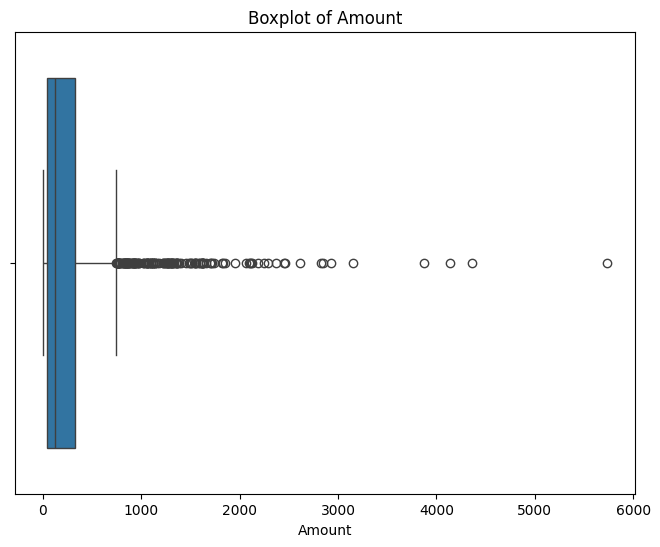

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=details['Amount'])
plt.title('Boxplot of Amount')
plt.show()

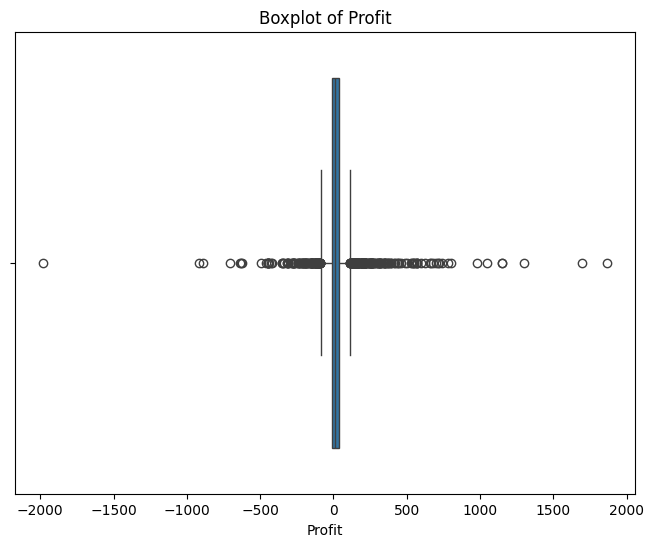

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=details['Profit'])
plt.title('Boxplot of Profit')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x78c90e7f1720>,
 'caps': [<matplotlib.lines.Line2D at 0x78c90e7f1a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x78c90e7f12a0>],
 'medians': [<matplotlib.lines.Line2D at 0x78c90e7f10f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78c90e7f2b00>],
 'means': []}

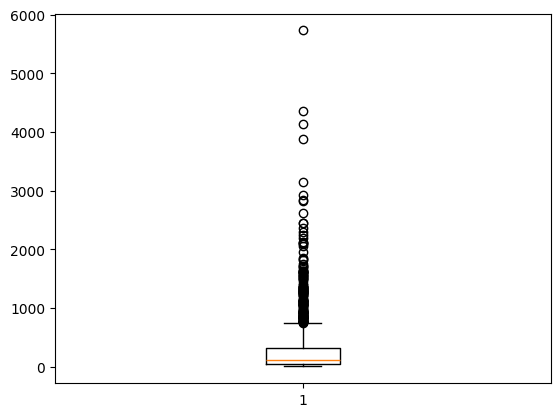

In [28]:
plt.boxplot(details['Amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x78c90c0d1540>,
 'caps': [<matplotlib.lines.Line2D at 0x78c90c0d1a80>,
 'boxes': [<matplotlib.lines.Line2D at 0x78c90c0d08b0>],
 'medians': [<matplotlib.lines.Line2D at 0x78c90c0d1b40>],
 'fliers': [<matplotlib.lines.Line2D at 0x78c90c0d13f0>],
 'means': []}

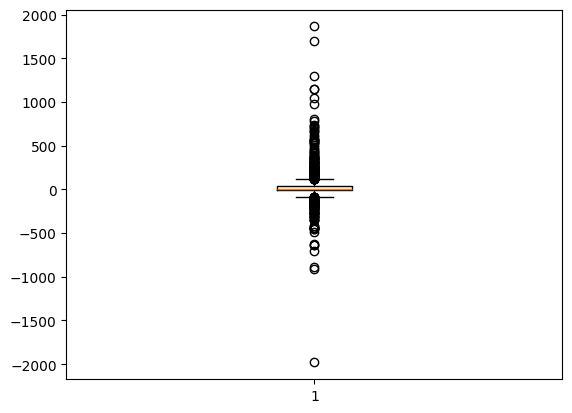

In [29]:
plt.boxplot(details['Profit'])

<Axes: ylabel='Profit'>

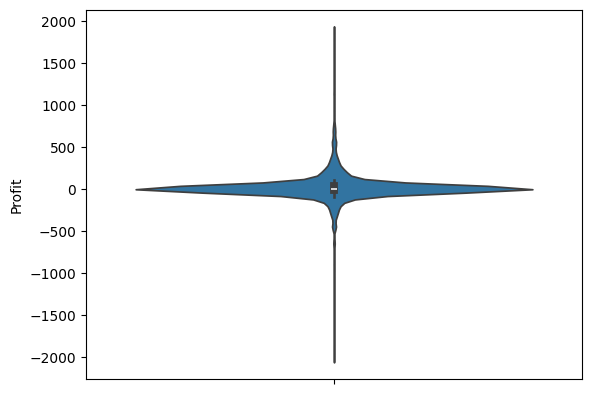

In [30]:
sns.violinplot(details['Profit'])

<Axes: ylabel='Amount'>

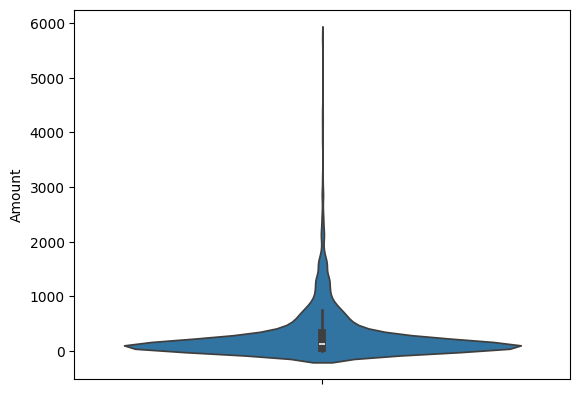

In [31]:
sns.violinplot(details['Amount'])

In [32]:
details[details['Amount']>1000]

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card
...,...,...,...,...,...,...,...
1490,B-25858,2457,665,11,Electronics,Electronic Games,EMI
1492,B-25798,2830,-1981,13,Furniture,Bookcases,EMI
1496,B-25757,3151,-35,7,Clothing,Trousers,EMI
1497,B-25973,4141,1698,13,Electronics,Printers,COD


In [33]:
sorted_details = details[details['Amount'] > 1000].sort_values(by='Amount', ascending=False)

In [34]:
sorted_details

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
1,B-26055,5729,64,14,Furniture,Chairs,EMI
1499,B-25993,4363,305,5,Furniture,Tables,EMI
1497,B-25973,4141,1698,13,Electronics,Printers,COD
12,B-25923,3873,-891,6,Electronics,Phones,Credit Card
1496,B-25757,3151,-35,7,Clothing,Trousers,EMI
...,...,...,...,...,...,...,...
75,B-25728,1055,264,4,Electronics,Printers,EMI
166,B-25749,1052,-82,3,Furniture,Bookcases,UPI
1404,B-25667,1030,206,8,Electronics,Printers,UPI
1455,B-25855,1027,441,8,Clothing,Saree,COD
